In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Exemplo de rótulos verdadeiros e previstos (para 10 classes)**negrito**

In [9]:
y_true = np.random.randint(0, 10, 100)
y_pred = y_true.copy()
# Adiciona alguns erros aleatórios
for i in range(10):
    idx = np.random.choice(range(100), 2, replace=False)
    y_pred[idx] = (y_pred[idx] + np.random.randint(1, 10)) % 10

## Calcula a matriz de confusão normalizada


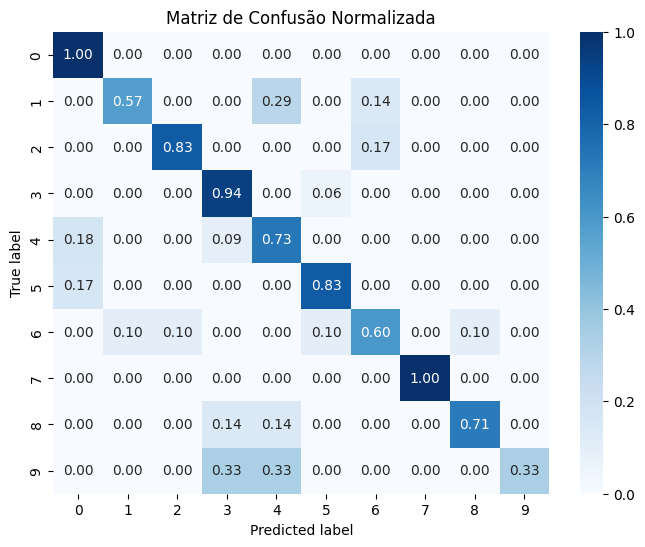

In [10]:
cm = confusion_matrix(y_true, y_pred, labels=range(10), normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", cbar=True,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusão Normalizada')
plt.show()

## Cálculo das métricas globais


In [12]:
acuracia = accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred, average='macro')
sensibilidade = recall_score(y_true, y_pred, average='macro')
fscore = f1_score(y_true, y_pred, average='macro')

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão (macro): {precisao:.2f}")
print(f"Sensibilidade/Recall (macro): {sensibilidade:.2f}")
print(f"F-score (macro): {fscore:.2f}")

Acurácia: 0.81
Precisão (macro): 0.82
Sensibilidade/Recall (macro): 0.76
F-score (macro): 0.76


## Especificidade para cada classe


In [13]:
cm_raw = confusion_matrix(y_true, y_pred, labels=range(10))
especificidades = []
for i in range(10):
    # VN = soma de todos menos linha e coluna da classe i
    # FP = soma da coluna i, menos o elemento da diagonal
    # FN = soma da linha i, menos o elemento da diagonal
    # VP = elemento da diagonal
    VP = cm_raw[i, i]
    FP = cm_raw[:, i].sum() - VP
    FN = cm_raw[i, :].sum() - VP
    VN = cm_raw.sum() - (VP + FP + FN)
    especificidade = VN / (VN + FP) if (VN + FP) > 0 else 0
    especificidades.append(especificidade)
print("Especificidade média: {:.2f}".format(np.mean(especificidades)))

Especificidade média: 0.98
